In [25]:
import os
import glob
import shutil
import random

import numpy as np
import matplotlib.pyplot as plt
# import cv2

In [26]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, InputLayer
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image_dataset_from_directory

print(tf.__version__)

2.3.0


In [27]:
# test_img = cv2.imread(r'C:\python\Data Science Training\Prjects\glucoma\Glaucoma\2 (13).jpg')
# test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# plt.imshow(test_img)
# test_img.shape

In [55]:
train_dir = r"dataset\train"
test_dir = r"dataset\test"

BATCH_SIZE = 5
IMG_SIZE = (192, 192)

In [56]:
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             label_mode='binary')

Found 60 files belonging to 2 classes.


In [57]:
test_dataset = image_dataset_from_directory(test_dir,
                                              shuffle=True,
                                              batch_size=BATCH_SIZE,
                                              image_size=IMG_SIZE,
                                              label_mode='binary')

Found 20 files belonging to 2 classes.


In [66]:
count=0
for x,y in train_dataset.take():
    x=x
    y=y
    count=+1
print(count)

1


In [71]:
train_dataset

<BatchDataset shapes: ((None, 192, 192, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [17]:
train_dataset.class_names

['glu', 'non-glu']

In [18]:
# to prefetch a bunch of images, so that the i/o doesnt get blocked

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [19]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomFlip('vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomCrop(3, 3),
    tf.keras.layers.experimental.preprocessing.RandomZoom(-0.5, 0.5),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3)
])

In [20]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(192, 192),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)
])


In [22]:
model = Sequential()

#model.add(tf.keras.Input(shape=(192, 192, 3)))

model.add(resize_and_rescale)
model.add(data_augmentation)

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',
                 padding='same', input_shape=(192, 192, 3)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 padding='same', input_shape=(192, 192, 3)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [24]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [146]:
results = model.fit_generator(train_dataset,
                              epochs=50,
                              validation_data=test_dataset)

Epoch 1/50
4/4 [==============================] - 2s 390ms/step - loss: 31.9508 - accuracy: 0.6406 - val_loss: 8.1453 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 1s 374ms/step - loss: 13.2770 - accuracy: 0.6719 - val_loss: 0.8845 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 2s 406ms/step - loss: 14.3992 - accuracy: 0.5469 - val_loss: 5.2201 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 2s 426ms/step - loss: 10.2625 - accuracy: 0.5781 - val_loss: 2.1555 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 1s 359ms/step - loss: 4.4513 - accuracy: 0.6094 - val_loss: 1.2317 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 2s 436ms/step - loss: 1.4838 - accuracy: 0.6406 - val_loss: 1.5482 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 1s 355ms/step - loss: 1.4121 - accuracy: 0.4844 - val_loss: 1.7387 - val_accuracy: 0.5000
Epoch 8/50
4/4 [

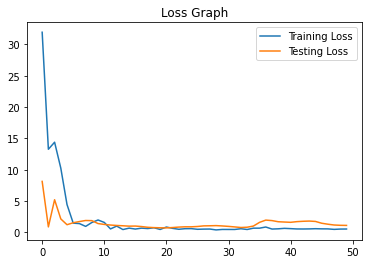

In [147]:
plt.title('Loss Graph')
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Testing Loss')
plt.legend()

In [78]:
ls

 Volume in drive C is OS
 Volume Serial Number is DCB4-1DA7

 Directory of C:\python\Data Science Training\Prjects\glucoma\models

02-07-2021  02:36    <DIR>          .
02-07-2021  02:36    <DIR>          ..
02-07-2021  02:36         4,653,328 model.h5
               1 File(s)      4,653,328 bytes
               2 Dir(s)  24,230,289,408 bytes free


In [79]:
import tensorflow as tf

saved_model = tf.keras.models.load_model('model.h5')

ValueError: No model found in config file.

In [150]:
import numpy as np
from keras.preprocessing import image

#C:\python\Data Science Training\Prjects\glucoma\non-glucoma\1 (13).jpg
#C:\python\Data Science Training\Prjects\glucoma\Glaucoma\2 (13).jpg

img_file = r'C:\python\Data Science Training\Prjects\glucoma\non-glucoma\1 (5).jpg'

img_file = image.load_img(img_file, target_size=(192, 192))

img_file = image.img_to_array(img_file)

img_file = np.expand_dims(img_file, axis=0)
img_file = img_file/255


prediction_prob = model.predict(img_file)
print(prediction_prob)

[[0.99980026]]
